# Summary of the facebook comment analysis from the classifier

## Note: run the LinearSVC classifier before running the code from this notebook

In [1]:
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup

import re
from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv("../results/LinearSVC_notebooks-comments.csv", sep="\t", header = 0)
df.head()

,label,message,author,likes
0,negative,Epilepsy is a part of the lives of many people...,Mark Allison,4
1,positive,Let's stop Epilepsy before it stops others!!!,Dawn Hoffman,2
2,negative,I've been living with Epilepsy since the age o...,Henry Thomas,0
3,neutral,Evan's kicking epilepsy's ass <ed><U+00A0><U+0...,Kerrie Dougherty,0
4,negative,Many famous people had epilepsy. Not many are ...,Kent McAfee,0


In [2]:
len(df)

5109

In [3]:
len(df.author.unique())

3029

In [5]:
pd.DataFrame(df.groupby(['author'])['label'].count()).sort_values(by='label',ascending=False)

,label
author,
Epilepsy Advocate,178
Mark Allison,43
Sharon Zimmerman Wellmaker,37
Athena Ramirez,22
Tim Tilt,16
Joy Kirlin Stewart,15
Janet Adams Bonzo,12
Elizabeth Robles,12
Lakeisha Parnell,12


In [100]:

df.groupby('label')['label'].count()

label
negative    2557
neutral     1592
positive     960
Name: label, dtype: int64

In [16]:
#df.groupby(['author'])['label'].count() > 3
high_comments = df.groupby('author').filter(lambda x: len(x) > 10).sort_values(by='author',ascending=False)
grouped = high_comments.groupby(['author','label'])['label'].count()

author                      label   
Athena Ramirez              negative     6
                            neutral     11
                            positive     5
Edward Crane                negative     7
                            neutral      4
Elizabeth Robles            negative     7
                            neutral      2
                            positive     3
Epilepsy Advocate           negative    89
                            neutral     45
                            positive    44
Jackie Moore                negative     6
                            neutral      4
                            positive     1
Janet Adams Bonzo           negative     9
                            neutral      1
                            positive     2
Joy Kirlin Stewart          negative     7
                            neutral      5
                            positive     3
Kathy Fowler                negative     8
                            neutral      2
                 

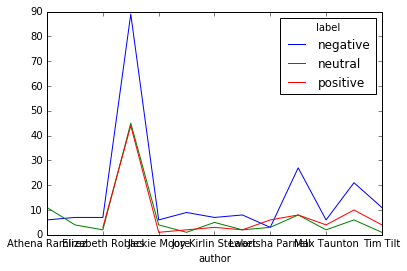

In [93]:
plt.figure()
high_comments.groupby(['author','label'])['label'].count().unstack().plot()